In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
filename_nexp1='results_allLT_nexp1.txt'
filename_nexp2='results_allLT_nexp2.txt'
#
# Note, these are assumed to be in spectral type order L0, L1, ... L9, T0, T1, ... T9
# which is the order produced by notebook bd_allLT_baseline_17 .  or could be sorted.
#  took output of notebook bd_allLT_baseline_17  and put into txt file, then  in terminal:
# cat results_allLT.txt | grep nexp2 > results_allLT_nexp2.txt
# cat results_allLT.txt | grep nexp1 > results_allLT_nexp1.txt
#

In [3]:
volume_nexp2 = np.zeros(20)
volume_nexp1 = np.zeros(20)
sptype = np.arange(20)

In [4]:
file_nexp2 = open(filename_nexp2, 'r')
lines_nexp2 = file_nexp2.readlines()
itype=0
for line in lines_nexp2:
    cutline=re.sub(".*{'VolumeSum': ","",line)
    keep=cutline[0:12]   #only first few figures are meaningful so truncation does no harm
    #we could get spectral type from the information in the line but instead we will assume it is in order
    volume_nexp2[itype]=float(keep)
    itype=itype+1
print(volume_nexp2)

[3102925.4705   2368257.5503   1839416.8387   1183601.6604
  627190.85211   514076.03977   365682.33489   180624.91032
  191870.63055   277806.90882   229477.6648    123145.16978
  212093.28426   256945.68855   289136.45558   115271.5183
   67845.744545   22749.844666   16652.80249    12768.411638]


In [5]:
file_nexp1 = open(filename_nexp1, 'r')
lines_nexp1 = file_nexp1.readlines()
itype=0
for line in lines_nexp1:
    cutline=re.sub(".*{'VolumeSum': ","",line)
    keep=cutline[0:12]   #only first few figures are meaningful so truncation does no harm
    #we could get spectral type from the information in the line but instead we will assume it is in order
    volume_nexp1[itype]=float(keep)
    itype=itype+1
print(volume_nexp1)

[3337983.9527   2540181.7047   1968398.8618   1262983.0143
  667493.27491   545958.29398   389000.11077   191443.37532
  203489.50535   293526.21932   243374.08706   130091.1994
  225477.89698   271978.82819   306163.48812   121833.84745
   71674.617786   24257.708189   17318.138895   13175.284922]


Text(0.5, 0, 'Spectral Type')

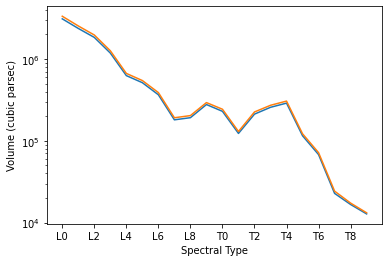

In [6]:
plt.plot(sptype,volume_nexp2,'-')
plt.plot(sptype,volume_nexp1,'-')
plt.yscale('log')
plt.xticks([0,2,4,6,8,10,12,14,16,18],["L0","L2","L4","L6","L8","T0","T2","T4","T6","T8"])
plt.ylabel('Volume (cubic parsec)')
plt.xlabel('Spectral Type')

In the next step, we will compute the number of ultracool dwarfs expected. We use the space densities measured by two different groups: Kirkpatrick et al. 2021 (2021ApJS..253....7K) and Best et al. 2021 (2021AJ....161...42B).  Note that these teams have made different analysis choices but most of the samples (and data for the individual objects) heavily overlap.  

In [7]:
from astropy.io import ascii

filename='brown_dwarf_data.txt'
bd_data = ascii.read(filename)
# space density units are objects per cubic parsec from Kirkpatrick et al. 2021
# sd_best21 is space density, same units, from Best et al. 2021.  NOTE: NOT INDEPENDENT SAMPLES!!!!
# type 1 = L1-L1.5, 10 = T0.0-0.5, etc.  
bd_data

type,spacedensity,Mz,My,Mi,sd_best21
int64,float64,float64,float64,float64,float64
0,0.00031,14.52,13.58,16.0,0.00032
1,0.00063,14.93,13.97,16.41,0.00063
2,0.00047,15.3,14.33,16.73,0.00044
3,0.00028,15.88,14.89,17.4,0.00046
4,0.00066,16.68,15.66,18.35,0.00049
5,0.00066,16.94,15.87,18.71,0.00069
6,0.00081,17.35,16.27,19.27,0.00034
7,0.0006,18.18,17.13,20.09,0.00035
8,0.00031,18.1,17.04,20.38,0.0005


In [11]:
observed_numbers = bd_data['spacedensity'] * volume_nexp2
observed_numbers_best21 = bd_data['sd_best21'] * volume_nexp2

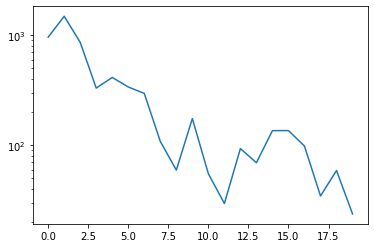

In [12]:
plt.plot(sptype,observed_numbers)
plt.yscale('log')

Text(0, 0.5, 'Number')

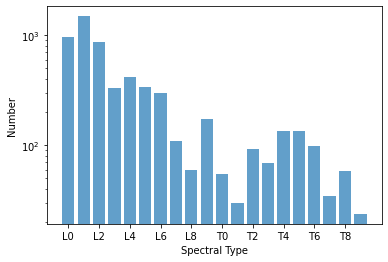

In [15]:
plt.bar(sptype,observed_numbers,alpha=0.7,width=0.8)
plt.xticks([0,2,4,6,8,10,12,14,16,18],["L0","L2","L4","L6","L8","T0","T2","T4","T6","T8"])
plt.yscale('log')
plt.xlabel('Spectral Type')
plt.ylabel('Number');

Text(0, 0.5, 'Number [Best20]')

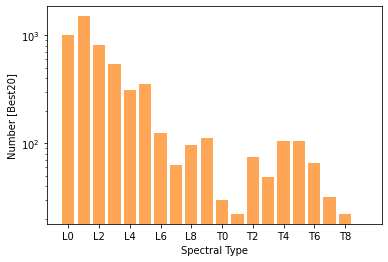

In [19]:
plt.bar(sptype,observed_numbers_best21,color='C1',alpha=0.7,width=0.8)
plt.xticks([0,2,4,6,8,10,12,14,16,18],["L0","L2","L4","L6","L8","T0","T2","T4","T6","T8"])
plt.yscale('log')
plt.xlabel('Spectral Type')
plt.ylabel('Number [Best20]');

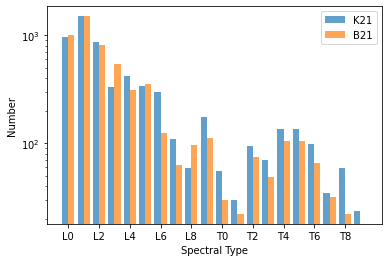

In [24]:
plt.bar(sptype-0.2,observed_numbers,alpha=0.7,width=0.4,label='K21')
plt.bar(sptype+0.2,observed_numbers_best21,alpha=0.7,width=0.4,label='B21')
plt.xticks([0,2,4,6,8,10,12,14,16,18],["L0","L2","L4","L6","L8","T0","T2","T4","T6","T8"])
plt.yscale('log')
plt.xlabel('Spectral Type')
plt.legend()
plt.ylabel('Number');